In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Paper
lsm = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/LSM_HHK_Fig10_LSM_results.csv')
# My run
# lsm = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing1/evaluation_runs/eval_run_LSM_MonthlySwing1.csv')
lsm['Payoff'] = np.maximum((lsm['spot'] - 1) * lsm['q_actual'], 0)

lsmg = lsm.groupby('episode_idx').agg({
    'reward': 'sum',
    'Payoff': 'sum',
    'spot': 'mean',
    'action': ['sum', 'min', 'max', 'mean']
})
# Flatten MultiIndex columns
lsmg.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in lsmg.columns.values]
lsmg = lsmg.rename(columns={
    'action_sum': 'action_total',
    'action_min': 'action_min',
    'action_max': 'action_max',
    'action_mean': 'action_mean'
})

print(f'Action unique values: {lsm["action"].unique()}')
print(f'Payoff Mean: {lsmg["Payoff_sum"].mean()}')

# unique episode_idx
# Get unique episodes and steps efficiently using pandas
episode_spot_data = lsm.pivot(index='step', columns='episode_idx', values='spot')
paths = np.array( episode_spot_data.T.values.tolist() )

# plot the paths using tab:blue and alpha=0.2
plt.figure(figsize=(10, 6))
plt.plot(paths, color='tab:blue', alpha=0.2)
plt.title('Paths of the Spot Price')
plt.xlabel('Step') ; plt.ylabel('Spot Price')
plt.grid() ; plt.tight_layout() ; plt.show()

lsmg.describe()

KeyError: 'spot'

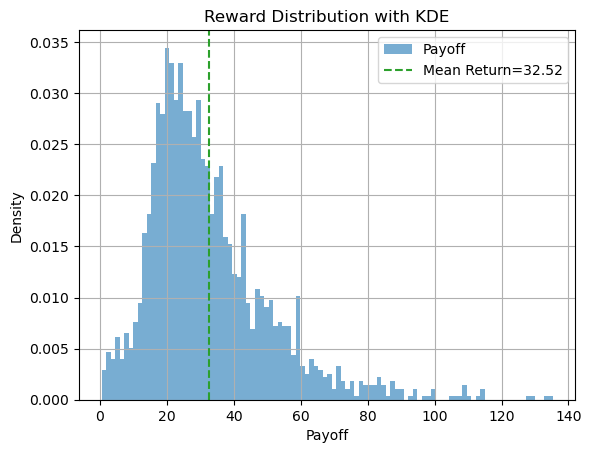

In [70]:
lsmg['Payoff_sum'].hist(label='Payoff', color='tab:blue', bins=100, density=True, alpha=0.6)
# lsmg['Payoff_sum'].plot(kind='kde', color='tab:orange', label='KDE')
mean_return = lsmg['Payoff_sum'].mean()
q1 = lsmg['Payoff_sum'].quantile(0.01)
q99 = lsmg['Payoff_sum'].quantile(0.999)
plt.axvline(mean_return, color='tab:green', linestyle='--', label=f'Mean Return={mean_return:.2f}')
# plt.xlim(left=0, right=q99)
plt.legend()
plt.xlabel('Payoff')
plt.ylabel('Density')
plt.title('Reward Distribution with KDE')
plt.show()

---
# RL - Results

In [60]:
rl = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing1/evaluation_runs/eval_run_8192.csv')

rl['Payoff'] = np.maximum((rl['spot'] - 100) * rl['q_actual'], 0)

rlg = rl.groupby('episode_idx').agg({
    'reward': 'sum',
    'Payoff': 'sum',
    'spot': 'mean',
    'action': ['sum', 'min', 'max', 'mean']
})
# Flatten MultiIndex columns
rlg.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in rlg.columns.values]
rlg = rlg.rename(columns={
    'action_sum': 'action_total',
    'action_min': 'action_min',
    'action_max': 'action_max',
    'action_mean': 'action_mean'
})

print(f'Action unique values: {rl["action"].unique()}')
print(f'Payoff Mean: {rlg["Payoff_sum"].mean()}')
rl

Action unique values: [0.       1.       0.091916 ... 0.329459 0.877006 0.984141]
Payoff Mean: 520.2523265094385


,episode_idx,step,spot,q_remain,q_exerc,time_left,action,q_actual,reward,Payoff
0,0,0,100.0000,20.0000,0.0000,0.0833,0.000000,0.0000,0.000000,0.000000
1,0,1,118.8286,20.0000,0.0000,0.0795,0.000000,0.0000,0.000000,0.000000
2,0,2,117.9376,20.0000,0.0000,0.0757,1.000000,2.0000,35.861686,35.875200
3,0,3,103.5474,18.0000,2.0000,0.0719,0.091916,0.1838,0.651762,0.652012
4,0,4,117.5921,17.8162,2.1838,0.0682,0.285320,0.5706,10.031142,10.038052
...,...,...,...,...,...,...,...,...,...,...
90000,4095,17,135.5883,8.3171,11.6829,0.0189,1.000000,2.0000,70.947830,71.176600
90001,4095,18,129.5757,6.3171,13.6829,0.0151,1.000000,2.0000,58.950094,59.151400
90002,4095,19,134.8890,4.3171,15.6829,0.0114,0.877006,1.7540,60.975934,61.195306
90003,4095,20,138.3376,2.5631,17.4369,0.0076,0.984141,1.9683,75.173941,75.459898


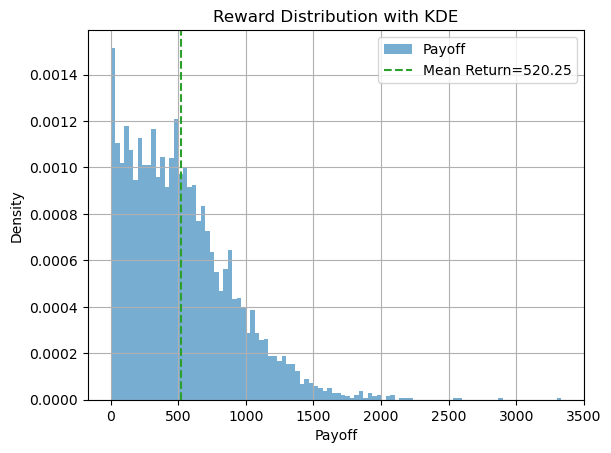

In [61]:
rlg['Payoff_sum'].hist(label='Payoff', color='tab:blue', bins=100, density=True, alpha=0.6)
# lsmg['Payoff_sum'].plot(kind='kde', color='tab:orange', label='KDE')
mean_return = rlg['Payoff_sum'].mean()
q1 = rlg['Payoff_sum'].quantile(0.01)
q99 = rlg['Payoff_sum'].quantile(0.999)
plt.axvline(mean_return, color='tab:green', linestyle='--', label=f'Mean Return={mean_return:.2f}')
# plt.xlim(left=0, right=q99)
plt.legend()
plt.xlabel('Payoff')
plt.ylabel('Density')
plt.title('Reward Distribution with KDE')
plt.show()


